In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from dmba import plotDecisionTree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
X, y = fetch_california_housing(return_X_y=True)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [2]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [3]:
criterion = ["squared_error", "friedman_mse", "absolute_error"]
splitter = ["best", "random"]
min_samples_split = [10,20,30,40,50,60]
max_depth = [5,10,20,30,35,40,45,50]
min_impurity_decrease = [0, 0.001, 0.005, 0.01]

In [4]:
metrics = pd.DataFrame(index=["MAE","MSE","RMSE","R"])
predictions = {"y_test": y_test} 
pred_df = pd.DataFrame(data=predictions)

# put new predictions into dataframe
pred_df["initial"] = tree.predict(X_test)

# put new metrics in dataframe
m_name = "initial"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.initial)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.initial)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.initial))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.initial)

In [5]:
parameters={"criterion":criterion}
criterion_tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring='neg_mean_squared_error', verbose=3)
criterion_tree.fit(X_train, y_train)


# put new predictions into dataframe
pred_df["criterion_tuned"] = criterion_tree.predict(X_test)

# put new metrics in dataframe
m_name = "criterion_tuned"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.criterion_tuned)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.criterion_tuned)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.criterion_tuned))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.criterion_tuned)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..........criterion=squared_error;, score=-0.552 total time=   0.1s
[CV 2/5] END ..........criterion=squared_error;, score=-0.464 total time=   0.1s
[CV 3/5] END ..........criterion=squared_error;, score=-0.568 total time=   0.1s
[CV 4/5] END ..........criterion=squared_error;, score=-0.549 total time=   0.1s
[CV 5/5] END ..........criterion=squared_error;, score=-0.546 total time=   0.1s
[CV 1/5] END ...........criterion=friedman_mse;, score=-0.541 total time=   0.1s
[CV 2/5] END ...........criterion=friedman_mse;, score=-0.449 total time=   0.1s
[CV 3/5] END ...........criterion=friedman_mse;, score=-0.560 total time=   0.1s
[CV 4/5] END ...........criterion=friedman_mse;, score=-0.561 total time=   0.1s
[CV 5/5] END ...........criterion=friedman_mse;, score=-0.546 total time=   0.1s
[CV 1/5] END .........criterion=absolute_error;, score=-0.532 total time=   7.4s
[CV 2/5] END .........criterion=absolute_error;, 

In [6]:
parameters={"splitter":splitter}
splitter_tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring='neg_mean_squared_error', verbose=3)
splitter_tree.fit(X_train, y_train)

# put new predictions into dataframe
pred_df["splitter_tuned"] = splitter_tree.predict(X_test)

# put new metrics in dataframe
m_name = "splitter_tuned"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.splitter_tuned)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.splitter_tuned)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.splitter_tuned))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.splitter_tuned)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....................splitter=best;, score=-0.540 total time=   0.1s
[CV 2/5] END ....................splitter=best;, score=-0.474 total time=   0.1s
[CV 3/5] END ....................splitter=best;, score=-0.550 total time=   0.1s
[CV 4/5] END ....................splitter=best;, score=-0.559 total time=   0.1s
[CV 5/5] END ....................splitter=best;, score=-0.531 total time=   0.1s
[CV 1/5] END ..................splitter=random;, score=-0.578 total time=   0.0s
[CV 2/5] END ..................splitter=random;, score=-0.583 total time=   0.0s
[CV 3/5] END ..................splitter=random;, score=-0.661 total time=   0.0s
[CV 4/5] END ..................splitter=random;, score=-0.661 total time=   0.0s
[CV 5/5] END ..................splitter=random;, score=-0.651 total time=   0.0s


In [7]:
parameters={"min_samples_split":min_samples_split}
min_samples_split_tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring='neg_mean_squared_error', verbose=3)
min_samples_split_tree.fit(X_train, y_train)

# put new predictions into dataframe
pred_df["min_samples_split_tuned"] = min_samples_split_tree.predict(X_test)

# put new metrics in dataframe
m_name = "min_samples_split_tuned"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.min_samples_split_tuned)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.min_samples_split_tuned)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.min_samples_split_tuned))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.min_samples_split_tuned)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .............min_samples_split=10;, score=-0.489 total time=   0.1s
[CV 2/5] END .............min_samples_split=10;, score=-0.421 total time=   0.1s
[CV 3/5] END .............min_samples_split=10;, score=-0.496 total time=   0.1s
[CV 4/5] END .............min_samples_split=10;, score=-0.498 total time=   0.1s
[CV 5/5] END .............min_samples_split=10;, score=-0.467 total time=   0.1s
[CV 1/5] END .............min_samples_split=20;, score=-0.450 total time=   0.1s
[CV 2/5] END .............min_samples_split=20;, score=-0.377 total time=   0.1s
[CV 3/5] END .............min_samples_split=20;, score=-0.435 total time=   0.1s
[CV 4/5] END .............min_samples_split=20;, score=-0.431 total time=   0.1s
[CV 5/5] END .............min_samples_split=20;, score=-0.431 total time=   0.1s
[CV 1/5] END .............min_samples_split=30;, score=-0.428 total time=   0.1s
[CV 2/5] END .............min_samples_split=30;, 

In [8]:
parameters={"max_depth":max_depth}
max_depth_tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring='neg_mean_squared_error', verbose=3)
max_depth_tree.fit(X_train, y_train)

# put new predictions into dataframe
pred_df["max_depth_tuned"] = max_depth_tree.predict(X_test)

# put new metrics in dataframe
m_name = "max_depth_tuned"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.max_depth_tuned)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.max_depth_tuned)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.max_depth_tuned))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.max_depth_tuned)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......................max_depth=5;, score=-0.507 total time=   0.0s
[CV 2/5] END ......................max_depth=5;, score=-0.475 total time=   0.0s
[CV 3/5] END ......................max_depth=5;, score=-0.519 total time=   0.0s
[CV 4/5] END ......................max_depth=5;, score=-0.513 total time=   0.0s
[CV 5/5] END ......................max_depth=5;, score=-0.516 total time=   0.0s
[CV 1/5] END .....................max_depth=10;, score=-0.427 total time=   0.1s
[CV 2/5] END .....................max_depth=10;, score=-0.368 total time=   0.1s
[CV 3/5] END .....................max_depth=10;, score=-0.448 total time=   0.1s
[CV 4/5] END .....................max_depth=10;, score=-0.436 total time=   0.1s
[CV 5/5] END .....................max_depth=10;, score=-0.440 total time=   0.1s
[CV 1/5] END .....................max_depth=20;, score=-0.541 total time=   0.1s
[CV 2/5] END .....................max_depth=20;, 

In [9]:
parameters={"min_impurity_decrease":min_impurity_decrease}
min_impurity_decrease_tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring='neg_mean_squared_error', verbose=3)
min_impurity_decrease_tree.fit(X_train, y_train)

# put new predictions into dataframe
pred_df["min_impurity_decrease_tuned"] = min_impurity_decrease_tree.predict(X_test)

# put new metrics in dataframe
m_name = "min_impurity_decrease_tuned"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.min_impurity_decrease_tuned)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.min_impurity_decrease_tuned)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.min_impurity_decrease_tuned))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.min_impurity_decrease_tuned)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........min_impurity_decrease=0;, score=-0.559 total time=   0.1s
[CV 2/5] END ..........min_impurity_decrease=0;, score=-0.451 total time=   0.1s
[CV 3/5] END ..........min_impurity_decrease=0;, score=-0.558 total time=   0.1s
[CV 4/5] END ..........min_impurity_decrease=0;, score=-0.543 total time=   0.1s
[CV 5/5] END ..........min_impurity_decrease=0;, score=-0.543 total time=   0.1s
[CV 1/5] END ......min_impurity_decrease=0.001;, score=-0.421 total time=   0.1s
[CV 2/5] END ......min_impurity_decrease=0.001;, score=-0.355 total time=   0.0s
[CV 3/5] END ......min_impurity_decrease=0.001;, score=-0.431 total time=   0.1s
[CV 4/5] END ......min_impurity_decrease=0.001;, score=-0.431 total time=   0.1s
[CV 5/5] END ......min_impurity_decrease=0.001;, score=-0.406 total time=   0.1s
[CV 1/5] END ......min_impurity_decrease=0.005;, score=-0.506 total time=   0.0s
[CV 2/5] END ......min_impurity_decrease=0.005;, 

In [10]:
metrics

,initial,criterion_tuned,splitter_tuned,min_samples_split_tuned,max_depth_tuned,min_impurity_decrease_tuned
MAE,0.447829,0.452123,0.458281,0.397010,0.423103,0.441649
MSE,0.489818,0.500939,0.508502,0.370890,0.415001,0.395776
RMSE,0.699870,0.707770,0.713093,0.609008,0.644206,0.629107
R,0.630890,0.622510,0.616810,0.720510,0.687269,0.701757


In [11]:
metrics_T = metrics.transpose()

<AxesSubplot: >

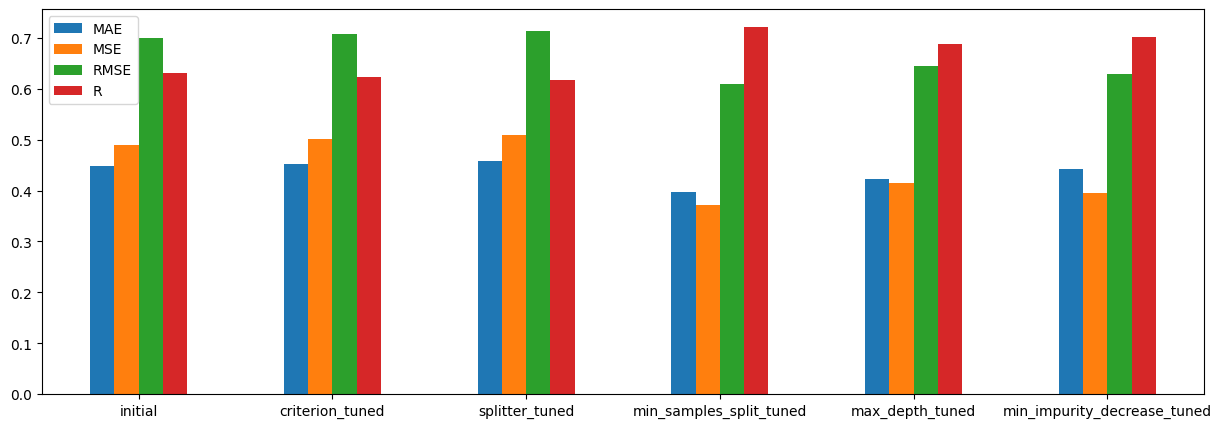

In [12]:
metrics_T.plot.bar(figsize=(15,5), rot=0)

In [13]:
print(f"Best params in criterion_tuned: {criterion_tree.best_params_}")
print(f"Best params in splitter_tuned: {splitter_tree.best_params_}")
print(f"Best params in min_samples_split_tuned: {min_samples_split_tree.best_params_}")
print(f"Best params in max_depth_tuned: {max_depth_tree.best_params_}")
print(f"Best params in min_impurity_decrease_tuned: {min_impurity_decrease_tree.best_params_}")

Best params in criterion_tuned: {'criterion': 'friedman_mse'}
Best params in splitter_tuned: {'splitter': 'best'}
Best params in min_samples_split_tuned: {'min_samples_split': 60}
Best params in max_depth_tuned: {'max_depth': 10}
Best params in min_impurity_decrease_tuned: {'min_impurity_decrease': 0.001}


In [14]:
crit = DecisionTreeRegressor(criterion='friedman_mse')
split = DecisionTreeRegressor(splitter='best')
min_sam = DecisionTreeRegressor(min_samples_split=60)
max_depth = DecisionTreeRegressor(max_depth=10)
min_imp = DecisionTreeRegressor(min_impurity_decrease=0.001)

start = time.time()
crit.fit(X_train, y_train)
end = time.time()
print("Time taken to fit crit: " + str(end - start))

start = time.time()
split.fit(X_train, y_train)
end = time.time()
print("Time taken to fit split: " + str(end - start))

start = time.time()
min_sam.fit(X_train, y_train)
end = time.time()
print("Time taken to fit min_sam: " + str(end - start))

start = time.time()
max_depth.fit(X_train, y_train)
end = time.time()
print("Time taken to fit max_depth: " + str(end - start))

start = time.time()
min_imp.fit(X_train, y_train)
end = time.time()
print("Time taken to fit min_imp: " + str(end - start))

print("")

print(f"Nodes in criterion_tuned: {tree.tree_.node_count}")
print(f"Nodes in criterion_tuned: {crit.tree_.node_count}")
print(f"Nodes in splitter_tuned: {split.tree_.node_count}")
print(f"Nodes in min_samples_split_tuned: {min_sam.tree_.node_count}")
print(f"Nodes in max_depth_tuned: {max_depth.tree_.node_count}")
print(f"Nodes in min_impurity_decrease_tuned: {min_imp.tree_.node_count}")

Time taken to fit crit: 0.15850090980529785
Time taken to fit split: 0.13674497604370117
Time taken to fit min_sam: 0.08978581428527832
Time taken to fit max_depth: 0.07639384269714355
Time taken to fit min_imp: 0.06408405303955078

Nodes in criterion_tuned: 31679
Nodes in criterion_tuned: 31711
Nodes in splitter_tuned: 31685
Nodes in min_samples_split_tuned: 1287
Nodes in max_depth_tuned: 1547
Nodes in min_impurity_decrease_tuned: 169


In [15]:
time_taken = pd.DataFrame(index=["crit","split","min_sam","max_depth", "min_imp"])
time_taken.at["crit", "time"] = 0.12783098220825195
time_taken.at["split", "time"] = 0.12884092330932617
time_taken.at["min_sam", "time"] = 0.09355807304382324
time_taken.at["max_depth", "time"] = 0.08002781867980957
time_taken.at["min_imp", "time"] = 0.0688788890838623
time_taken

,time
crit,0.127831
split,0.128841
min_sam,0.093558
max_depth,0.080028
min_imp,0.068879


Text(0, 0.5, 'time')

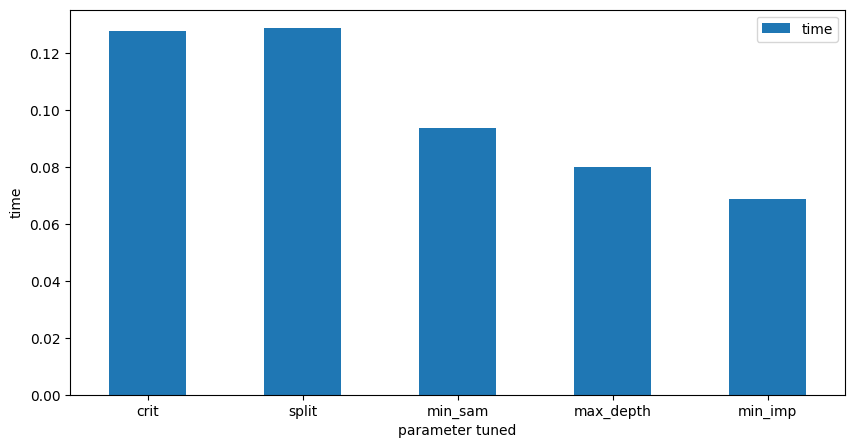

In [16]:
ax = time_taken.plot.bar(figsize=(10,5), rot=0,)
ax.set_xlabel("parameter tuned")
ax.set_ylabel("time")

In [18]:
# Hyper parameter tuning using gridsearchcv
parameters = {
    "criterion": ["squared_error", "friedman_mse"],
    "splitter": ["best", "random"],
    "min_samples_split": [20,30,40,50,60,65,70],
    "max_depth": [5,10,20,30,40,50,55,60,65],
    "min_impurity_decrease": [0, 0.001, 0.005, 0.01]
}

multip_param_cv_tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring='neg_mean_squared_error', verbose=3)
multip_param_cv_tree.fit(X_train, y_train)


# put new predictions into dataframe
pred_df["multiple_tuned"] = multip_param_cv_tree.predict(X_test)

# put new metrics in dataframe
m_name = "multiple_tuned"

metrics.at["MAE", m_name] = mean_absolute_error(pred_df.y_test, pred_df.multiple_tuned)
metrics.at["MSE", m_name] = mean_squared_error(pred_df.y_test, pred_df.multiple_tuned)
metrics.at["RMSE", m_name] = np.sqrt(mean_squared_error(pred_df.y_test, pred_df.multiple_tuned))
metrics.at["R", m_name] = r2_score(pred_df.y_test, pred_df.multiple_tuned)

metrics

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
[CV 1/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.507 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.475 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.519 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.513 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.516 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter=random;, score=-0.694 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, min_im

[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.516 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.683 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.668 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.766 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.671 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.674 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, splitter=bes

[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.517 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.518 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.856 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.718 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.670 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.691 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.001, min_samples_

[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.548 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.526 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.779 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.687 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.755 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.858 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.005, min_samples_

[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.704 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.764 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.836 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.900 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, min_impurity_decrease=0.01, min_samples_split=5

[CV 1/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.394 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.358 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.417 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.408 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=random;, score=-0.504 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=random;,

[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.430 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.406 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.514 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.559 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.584 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.574 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_s

[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=70, splitter=random;, score=-0.534 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.001, min_samples_split=70, splitter=random;, score=-0.550 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_sampl

[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=65, splitter=random;, score=-0.638 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=65, splitter=random;, score=-0.686 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=65, splitter=random;, score=-0.686 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=65, splitter=random;, score=-0.682 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min_samples_split=65, splitter=random;, score=-0.617 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.005, min

[CV 3/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.588 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.01, min_samples_split=60, splitter=random;, score=-0.750 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.01, min_samples_split=60, splitter=random;, score=-0.642 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.01, min_samples_split=60, splitter=random;, score=-0.633 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=10, min_impurity_decrease=0.01, min_samples_sp

[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.351 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.408 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.396 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0, min_samples_split=50, splitter=random;, score=-0.386 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0, min_samples_split=50, splitter=random;, score=-0.378 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0, min_samples_split=50, splitter=random

[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.001, min_samples_split=40, splitter=best;, score=-0.356 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.001, min_samples_split=40, splitter=best;, score=-0.434 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.001, min_samples_split=40, splitter=best;, score=-0.434 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.001, min_samples_split=40, splitter=best;, score=-0.405 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.001, min_samples_split=40, splitter=random;, score=-0.561 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.001, min_samples_split=40, splitter=random;, score=-0.480 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.001, min_sampl

[CV 1/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.005, min_samples_split=30, splitter=random;, score=-0.691 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.005, min_samples

[CV 1/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.585 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.531 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.588 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=20, splitter=random;, score=-0.711 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=

[CV 5/5] END criterion=squared_error, max_depth=20, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.683 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.445 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.379 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.438 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.436 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.427 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=rando

[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.404 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.335 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.405 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.398 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.462 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=random;,

[CV 3/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.438 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.434 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.404 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.522 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.502 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.526 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.001, min_sam

[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.667 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.005, min_samples

[CV 4/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.696 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.780 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.712 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.645 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=30, min_impurity_decrease=0.01, min_samples_

[CV 1/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.410 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.351 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.414 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=random;, score=-0.429 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=random;,

[CV 1/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.421 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.355 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.434 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.430 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.406 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.570 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.001, min_samples

[CV 4/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.639 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.586 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.704 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.642 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_s

[CV 3/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.673 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.652 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.661 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.005, min_sam

[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.531 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.588 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=random;, score=-0.762 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=random;, score=-0.727 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=40, min_impurity_decrease=0.01, min_samples_spli

[CV 1/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.399 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.341 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.402 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.392 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.387 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=random;, score=-0.494 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=random;,

[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.356 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.435 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.434 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.405 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=random;, score=-0.539 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=random;, score=-0.491 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.001, min_sampl

[CV 1/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=random;, score=-0.612 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.005, min_samples

[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.531 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.588 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=random;, score=-0.685 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=random;, score=-0.690 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_impurity_decrease=0.01, min_samples_spli

[CV 1/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.445 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.378 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.437 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.432 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.428 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=20, splitter=random;, score=-0.440 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=20, splitter=random;,

[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.336 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.404 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.390 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.466 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.408 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0, min_samples_split=70, splitter=random

[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.438 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.434 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.404 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.514 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.515 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.545 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.001, min_sam

[CV 1/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.669 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.005, min_samples

[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.531 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.588 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.740 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.653 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=55, min_impurity_decrease=0.01, min_samples_spli

[CV 5/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=random;, score=-0.413 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.411 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.358 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.413 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.396 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0, min_samples_split=40, splitter=random;,

[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.421 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.355 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.434 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.430 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.406 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.528 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.001, min_samples

[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.651 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples

[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.632 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.005, min_samples

[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.585 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.531 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.588 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.770 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=60, min_impurity_decrease=0.01, min_samples_split=

[CV 1/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.404 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.347 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.404 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.390 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0, min_samples_split=65, splitter=random;, score=-0.435 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0, min_samples_split=65, splitter=random;,

[CV 4/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.001, min_samples_split=60, splitter=best;, score=-0.434 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.001, min_samples_split=60, splitter=best;, score=-0.403 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.001, min_samples_split=60, splitter=random;, score=-0.553 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.001, min_samples_split=60, splitter=random;, score=-0.493 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.001, min_samples_split=60, splitter=random;, score=-0.526 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.001, min_samples_split=60, splitter=random;, score=-0.579 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.001, min_s

[CV 1/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.467 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.544 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.530 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.505 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.005, min_samples_split=50, splitter=random;, score=-0.727 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.005, min_samples

[CV 3/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.588 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.593 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.575 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.01, min_samples_split=40, splitter=random;, score=-0.725 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.01, min_samples_split=40, splitter=random;, score=-0.634 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.01, min_samples_split=40, splitter=random;, score=-0.741 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=65, min_impurity_decrease=0.01, min_samples_sp

[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.519 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.513 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.516 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0, min_samples_split=30, splitter=random;, score=-0.840 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0, min_samples_split=30, splitter=random;, score=-0.832 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0, min_samples_split=30, splitter=random;, score=-0.632 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0, min_samples_split=30, splitter=random;, score=-0.

[CV 2/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.475 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.519 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.513 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.516 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, splitter=random;, score=-0.714 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, splitter=random;, score=-0.608 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=20, s

[CV 1/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.508 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.475 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.519 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.513 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.516 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=70, splitter=random;, score=-0.693 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.001, min_samples_split=70, spl

[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.728 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.710 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.736 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.508 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.475 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.519 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.005, min_samples_split=65,

[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.513 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.516 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.650 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.597 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.784 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.754 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=5, min_impurity_decrease=0.01, min_samples_split=50, spli

[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.353 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.417 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.414 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=random;, score=-0.522 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0, min_samples_split=40, splitter=random;, score=

[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.398 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.353 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.423 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.409 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.402 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.576 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.001, min_samples_split=

[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.409 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.365 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.424 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.422 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.410 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.574 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=

[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.401 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.350 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.418 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.409 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.393 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.564 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.005, min_samples_split=

[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.400 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.355 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.420 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.417 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.392 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.01, min_samples_split=65, splitter=random;, score=-0.569 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=10, min_impurity_decrease=0.01, min_samples_split=65, spl

[CV 3/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.400 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.392 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.387 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0, min_samples_split=60, splitter=random;, score=-0.474 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0, min_samples_split=60, splitter=random;, score=-0.376 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0, min_samples_split=60, splitter=random;, score=-0.415 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0, min_samples_split=60, splitter=random;, sc

[CV 3/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.409 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.394 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.001, min_samples_split=50, splitter=random;, score=-0.463 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.001, min_samples_split=50, splitter=random;, score=-0.403 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.001, min_samples_split=50, splitter=random;, score=-0.438 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.001, min_samples_sp

[CV 2/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.354 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.413 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.399 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.005, min_samples_split=40, splitter=random;, score=-0.463 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.005, min_samples_split=40, splitter=random;, score=-0.381 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.005, min_samples_spli

[CV 1/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.427 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.362 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.421 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.399 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.408 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.01, min_samples_split=30, splitter=random;, score=-0.428 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=20, min_impurity_decrease=0.01, min_samples_split=30, spl

[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.378 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.438 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.442 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=best;, score=-0.426 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=random;, score=-0.461 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=random;, score=-0.415 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=20, splitter=random;, scor

[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.334 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.405 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.390 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.448 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=random;, score=-0.382 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0, min_samples_split=70, splitter=random;, scor

[CV 1/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.402 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.349 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.406 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.390 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.001, min_samples_split=65, splitter=random;, score=-0.376 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.001, min_samples_split=

[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.342 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.402 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.397 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=best;, score=-0.387 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.436 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.005, min_samples_split=60, splitter=random;, score=-0.432 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.005, min_samples_spli

[CV 1/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.406 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.349 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.409 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.402 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, splitter=random;, score=-0.404 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_impurity_decrease=0.01, min_samples_split=50, spl

[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.356 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.413 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.405 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=random;, score=-0.441 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=random;, score=-0.364 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0, min_samples_split=40, splitter=random;, scor

[CV 1/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.424 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.361 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.424 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.411 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=best;, score=-0.409 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.001, min_samples_split=30, splitter=random;, score=-0.401 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.001, min_samples_split=

[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.377 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.436 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.437 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=best;, score=-0.429 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.418 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=20, splitter=random;, score=-0.428 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_spli

[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.405 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.390 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.371 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.389 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_split=70, splitter=random;, score=-0.441 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.005, min_samples_sp

[CV 1/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.402 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.347 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.406 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.398 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, splitter=random;, score=-0.433 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_impurity_decrease=0.01, min_samples_split=65, spl

[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.339 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.402 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.392 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=best;, score=-0.387 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=random;, score=-0.424 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=random;, score=-0.397 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0, min_samples_split=60, splitter=random;, scor

[CV 1/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.407 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.347 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.409 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.391 total time=   0.2s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.001, min_samples_split=50, splitter=random;, score=-0.414 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.001, min_samples_split=

[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.354 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.413 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.405 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=random;, score=-0.460 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.005, min_samples_split=40, splitter=random;, score=-0.402 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.005, min_samples_spli

[CV 5/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=20, splitter=random;, score=-0.440 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.422 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.364 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.423 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.396 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, splitter=best;, score=-0.409 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=30, spl

[CV 5/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.453 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.444 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.434 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.433 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.416 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=20

[CV 3/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.406 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.390 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=65, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=65, splitter=random;, score=-0.416 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=65, splitter=random;, score=-0.369 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=65, splitter=random;, score=-0.406 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0, min_samples_split=65, splitter=random;, sc

[CV 1/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.001, min_samples_split=60, splitter=best;, score=-0.401 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.001, min_samples_split=60, splitter=best;, score=-0.342 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.001, min_samples_split=60, splitter=best;, score=-0.402 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.001, min_samples_split=60, splitter=best;, score=-0.400 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.001, min_samples_split=60, splitter=best;, score=-0.387 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.001, min_samples_split=60, splitter=random;, score=-0.431 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.001, min_samples_split=

[CV 2/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.348 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.410 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.402 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.005, min_samples_split=50, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.005, min_samples_split=50, splitter=random;, score=-0.468 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.005, min_samples_split=50, splitter=random;, score=-0.352 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.005, min_samples_spli

[CV 1/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.406 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.356 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.413 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.01, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.01, min_samples_split=40, splitter=random;, score=-0.415 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=55, min_impurity_decrease=0.01, min_samples_split=40, spl

[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.426 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.364 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.421 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.407 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=best;, score=-0.409 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=random;, score=-0.431 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0, min_samples_split=30, splitter=random;, score=

[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.382 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.440 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.432 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=20, splitter=best;, score=-0.427 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=20, splitter=random;, score=-0.494 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=20, splitter=random;, score=-0.361 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_spli

[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.402 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.335 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.405 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.395 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=70, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=70, splitter=random;, score=-0.450 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.001, min_samples_split=

[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.404 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.350 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.406 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.398 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.005, min_samples_split=65, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.005, min_samples_split=65, splitter=random;, score=-0.485 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.005, min_samples_split=

[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.399 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.341 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.402 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.400 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.01, min_samples_split=60, splitter=best;, score=-0.387 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.01, min_samples_split=60, splitter=random;, score=-0.386 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=60, min_impurity_decrease=0.01, min_samples_split=60, spl

[CV 1/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.407 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.348 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.409 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.394 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0, min_samples_split=50, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0, min_samples_split=50, splitter=random;, score=-0.414 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0, min_samples_split=50, splitter=random;, score=

[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.001, min_samples_split=40, splitter=best;, score=-0.413 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.001, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.001, min_samples_split=40, splitter=best;, score=-0.397 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.001, min_samples_split=40, splitter=random;, score=-0.444 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.001, min_samples_split=40, splitter=random;, score=-0.404 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.001, min_samples_split=40, splitter=random;, score=-0.424 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.001, min_samples_sp

[CV 1/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.425 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.367 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.422 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.410 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.005, min_samples_split=30, splitter=best;, score=-0.409 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.005, min_samples_split=30, splitter=random;, score=-0.439 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.005, min_samples_split=

[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.378 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.436 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.436 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=20, splitter=best;, score=-0.430 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=20, splitter=random;, score=-0.453 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=20, splitter=random;, score=-0.352 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=20, s

[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.405 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.390 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=70, splitter=best;, score=-0.388 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.394 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.410 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=70, splitter=random;, score=-0.424 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=65, min_impurity_decrease=0.01, min_samples_split=70,

,initial,criterion_tuned,splitter_tuned,min_samples_split_tuned,max_depth_tuned,min_impurity_decrease_tuned,multiple_tuned
MAE,0.447829,0.452123,0.458281,0.397010,0.423103,0.441649,0.397010
MSE,0.489818,0.500939,0.508502,0.370890,0.415001,0.395776,0.370890
RMSE,0.699870,0.707770,0.713093,0.609008,0.644206,0.629107,0.609008
R,0.630890,0.622510,0.616810,0.720510,0.687269,0.701757,0.720510


In [19]:
multip_param_cv_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 60,
 'min_impurity_decrease': 0.005,
 'min_samples_split': 60,
 'splitter': 'best'}

In [20]:
metrics

,initial,criterion_tuned,splitter_tuned,min_samples_split_tuned,max_depth_tuned,min_impurity_decrease_tuned,multiple_tuned
MAE,0.447829,0.452123,0.458281,0.397010,0.423103,0.441649,0.397010
MSE,0.489818,0.500939,0.508502,0.370890,0.415001,0.395776,0.370890
RMSE,0.699870,0.707770,0.713093,0.609008,0.644206,0.629107,0.609008
R,0.630890,0.622510,0.616810,0.720510,0.687269,0.701757,0.720510
